# <center> Classificação de Vinhos</center>

## Avaliação da Classificação com Base na Qualidade: RandomForestClassifier vs. XGBClassifier

O propósito deste estudo foi avaliar o desempenho de dois algoritmos de classificação, tendo a qualidade como critério principal. Durante a exploração das bibliotecas RandomForestClassifier e XGBClassifier, observei que, ao padronizar os dados com StandardScaler e reduzir o escopo para duas categorias de qualidade, nomeadas como "Good" (Bom) e "Not Good" (Não Bom), a precisão do modelo foi significativamente aprimorada. A simplificação envolveu a reclassificação de notas acima de 7 como "Good" e, posteriormente, a representação binária, onde 1 passou a indicar "Good" e 0, "Not Good", conforme as orientações do Kaggle de onde foi retirada a base para análise.

<img src="vinhos.png">


# Os resultados de acurácia obtidos foram os seguintes:

## Acerto do modelo com RandomForestClassifier: 90%
## Acerto do modelo com XGBClassifier: 88%


In [248]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier


In [249]:
df = pd.read_csv("winequality-red.csv")

In [250]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [251]:
#Verificar se há linhas vazias e o tipo de cada informação no dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


As informações da contagem de itens distintos da coluna 'quality' e os dados do describe já nos dão indicios de base desbalanceada. Há muitas notas 5 e 6 e poucas do restante.

In [252]:
df['quality'].value_counts().sort_index()

3     10
4     53
5    681
6    638
7    199
8     18
Name: quality, dtype: int64

C:\Users\Shirley Dezan\AppData\Local\Temp\ipykernel_28120\3798590974.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='quality', data=df, palette='viridis')


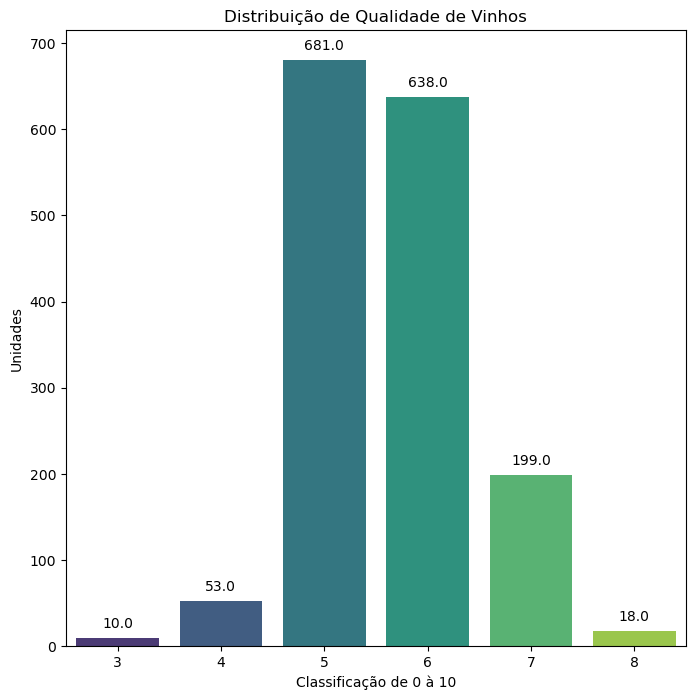

In [253]:
plt.figure(figsize=(8, 8))
ax = sns.countplot(x='quality', data=df, palette='viridis')
plt.title('Distribuição de Qualidade de Vinhos')
plt.xlabel('Classificação de 0 a 10')
plt.ylabel('Unidades')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

In [254]:
#Verificar quantos amostras tem no total, média das classificações, desvio padrão, entre maximo, minimo e seus quartis. 
df['quality'].describe()

count    1599.000000
mean        5.636023
std         0.807569
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality, dtype: float64

Criar a nota 7 ou superior sendo classificado como 'bom/1' e o restante como 'não bom/0'para o kaggle. 

In [255]:
# Primeiro vou criar uma nova coluna guia para facilitar a visualização dos dados após a transformação em 0 e 1
def categorizar_qualidade(valor):
    if valor <= 6:
        return 'Not Good'
    else:
        return 'Good'

# Aplicando a função usando apply para criar a nova coluna 'Categoria_Qualidade'
df['quality'] = df['quality'].apply(categorizar_qualidade)

In [256]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Not Good
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Not Good
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Not Good
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Not Good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Not Good


In [257]:
#Deixar uma coluna com as informações 'Good' = 1 e 'Not Good' = 0 para o modelo de treino e teste. 
df['quality_byn'] = df['quality'].map({'Not Good':0,
                                      'Good': 1})
#outra opção:
#df['quality_byn'] = df['quality'].apply(lambda x: 1 if x >= 7 else 0)

In [258]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_byn
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Not Good,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Not Good,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Not Good,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Not Good,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Not Good,0


Verificando se a contagem de valores distintos é a mesma entre as duas colunas

In [259]:
df['quality'].value_counts()

Not Good    1382
Good         217
Name: quality, dtype: int64

In [260]:
df['quality_byn'].value_counts()

0    1382
1     217
Name: quality_byn, dtype: int64

C:\Users\Shirley Dezan\AppData\Local\Temp\ipykernel_28120\1708601059.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='quality', data=df, palette='viridis')


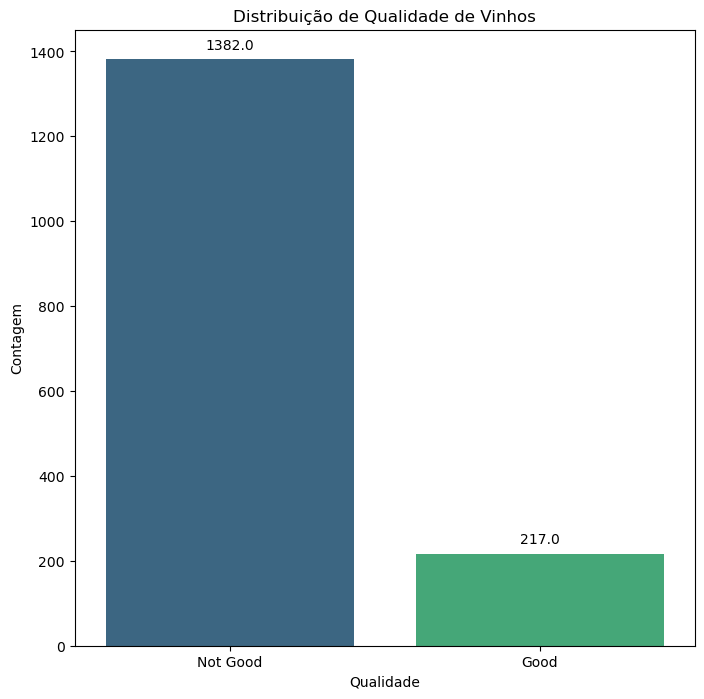

In [261]:
plt.figure(figsize=(8, 8))
ax = sns.countplot(x='quality', data=df, palette='viridis')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.title('Distribuição de Qualidade de Vinhos')
plt.xlabel('Qualidade')
plt.ylabel('Contagem')
plt.show()

In [280]:
#Excluir coluna do quality com Good ou Not Good para a normalização funcionar (não aceita objetos ou strings)
df_base = df.drop(['quality','quality_byn'], axis=1)
df_quality = df['quality_byn'].copy()

In [281]:
display(df_base)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


# Padronização dos dados - StandardScaler


In [282]:
# Inicializando o scaler
scaler = StandardScaler()

# Padronizando os dados do DataFrame
df_padrao = pd.DataFrame(scaler.fit_transform(df_base), columns=df_base.columns)


In [283]:
df_padrao = pd.concat([pd.DataFrame(df_padrao, columns=df_padrao.columns), df_quality], axis=1)

In [284]:
df_padrao.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_byn
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,0
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777,0
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777,0
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777,0
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,0


# Criando X e y para treinos

In [285]:
X = df_padrao.drop('quality_byn', axis=1).copy()
y = df_padrao['quality_byn'].copy()

In [286]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y , test_size = 0.3, stratify=y)

In [287]:
X_treino.shape, X_teste.shape, y_treino.shape, y_teste.shape

((1119, 11), (480, 11), (1119,), (480,))

In [288]:
def previsoes(lista):
    X_treino, X_teste, y_treino, y_teste = lista

    clf = RandomForestClassifier()
    clf.fit(X_treino, y_treino)
    y_pred_random = clf.predict(X_teste)
    acuracia_random = accuracy_score(y_pred_random, y_teste)
    
    modelo_xgb = XGBClassifier()
    modelo_xgb.fit(X_treino, y_treino)
    previsoes_xgb = modelo_xgb.predict(X_teste)
    acuracia_xgb = accuracy_score(y_teste, previsoes_xgb)


    return (f'Acurácia do RandomForestClassifier: {acuracia_random}',
            f'Acurácia do XGBClassifier: {acuracia_xgb}')


In [289]:
lista = X_treino, X_teste, y_treino, y_teste
base_padronizada = previsoes(lista)

In [290]:
base_padronizada

('Acurácia do RandomForestClassifier: 0.9041666666666667',
 'Acurácia do XGBClassifier: 0.8833333333333333')